# Inhaltsverzeichnis

1. [Laden und Vorverarbeitung der Daten](#1-Laden-und-Vorverarbeitung-der-Daten) <br>
    1.1 [Vorverarbeitung der Daten](#1-1-Vorverarbeitung-der-Daten) <br> 
2. [Explorative Datenanalyse (EDA)](#2-Explorative-Datenanalyse-(EDA)) <br> 
    2.1 [Mathematischer Hintergrund zu PCA](#2-1-Mathematischer-Hintergrund:-Hauptkomponentenanalyse-(PCA)) <br> 
3. [PCA-Implementierung und Interpretation](#3-PCA-Implementierung-und-Interpretation) <br>
    3.1 [PCA-Implementierung](#3-1-PCA-Implementierung) <br>
    3.2 [Mathematischer Hintergrund: Erklärte Varianz](#3-2-Mathematischer-Hintergrund:-Erklärte-Varianz) <br>
    3.3 [Erklärte Varianz](#3-3-Erklärte-Varianz-und-Scree-Test) <br>
    3.4 [Kumulativ erklärte Varianz](#3-4-Kumulativ-erklärte-Varianz)
4. [Visualisierung der PCA-Ergebnisse](#4-Visualisierung-der-PCA-Ergebnisse) <br>
    4.1 [Mathematischer Hintergrund: PCA-Visualisierung](#4-1-Mathematischer-Hintergrund:-PCA-Visualisierung) <br>
5. [Dimensionalitätsreduktion für maschinelles Lernen](#5-Dimensionalitätsreduktion-für-maschinelles-Lernen) <br>
    5.1 [PCA zur Dimensionalitätsreduzierung](#5-1-PCA-zur-Dimensionalitätsreduzierung)<br>
    5.2 [Modell für maschinelles Lernen mit PCA](#5-2-Modell-für-maschinelles-Lernen-mit-PCA) <br>
    5.3 [Modell ohne PCA](#5-3-Modell-ohne-PCA) <br> 
6. [Interpretation](#6-Interpretation) <br> 
    6.1[Warum PCA manchmal besser performt:](#6-1-Warum-PCA-manchmal-besser-performt:) <br> 

<a id="1-Laden-und-Vorverarbeitung-der-Daten"></a>

# 1. Laden und Vorverarbeitung der Daten  

Zunächst laden wir den Datensatz. Für dieses Projekt verwenden wir den Weindatensatz, der 13 Merkmale enthält, die sich auf die chemischen Eigenschaften von Weinen aus drei verschiedenen Anbaugebieten beziehen.

In [12]:
# # Importieren der erforderlichen Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Laden Sie den Wein-Datensatz
from sklearn.datasets import load_wine
data = load_wine()

# Erzeugen eines DataFrame zur Vereinfachung der Verwendung
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

# Anzeige der ersten paar Zeilen
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<a id="1-1-Vorverarbeitung-der-Daten"></a>

### 1.1 Vorverarbeitung der Daten 

Vor der Anwendung der PCA müssen wir die Daten vorverarbeiten. Die PCA reagiert empfindlich auf die Varianz der Merkmale, daher ist es wichtig, die Daten zu standardisieren.

In [13]:
# Trennen von Merkmalen und Ziel
X = df.drop('target', axis=1)
y = df['target']

# Standardisierung der Daten
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Skalierte Daten zur einfacheren Interpretation zurück in DataFrame konvertieren
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Die ersten Zeilen der normierten Daten anzeigen
X_scaled_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


<a id="2-Explorative-Datenanalyse-(EDA)"></a>

## 2. Explorative Datenanalyse (EDA) 

Bevor wir uns der PCA zuwenden, sollten wir einige grundlegende EDA-Maßnahmen durchführen, um den Datensatz zu verstehen. Wir werden die Korrelationsmatrix und die Paardiagramme untersuchen und die Varianz zwischen den Merkmalen prüfen.

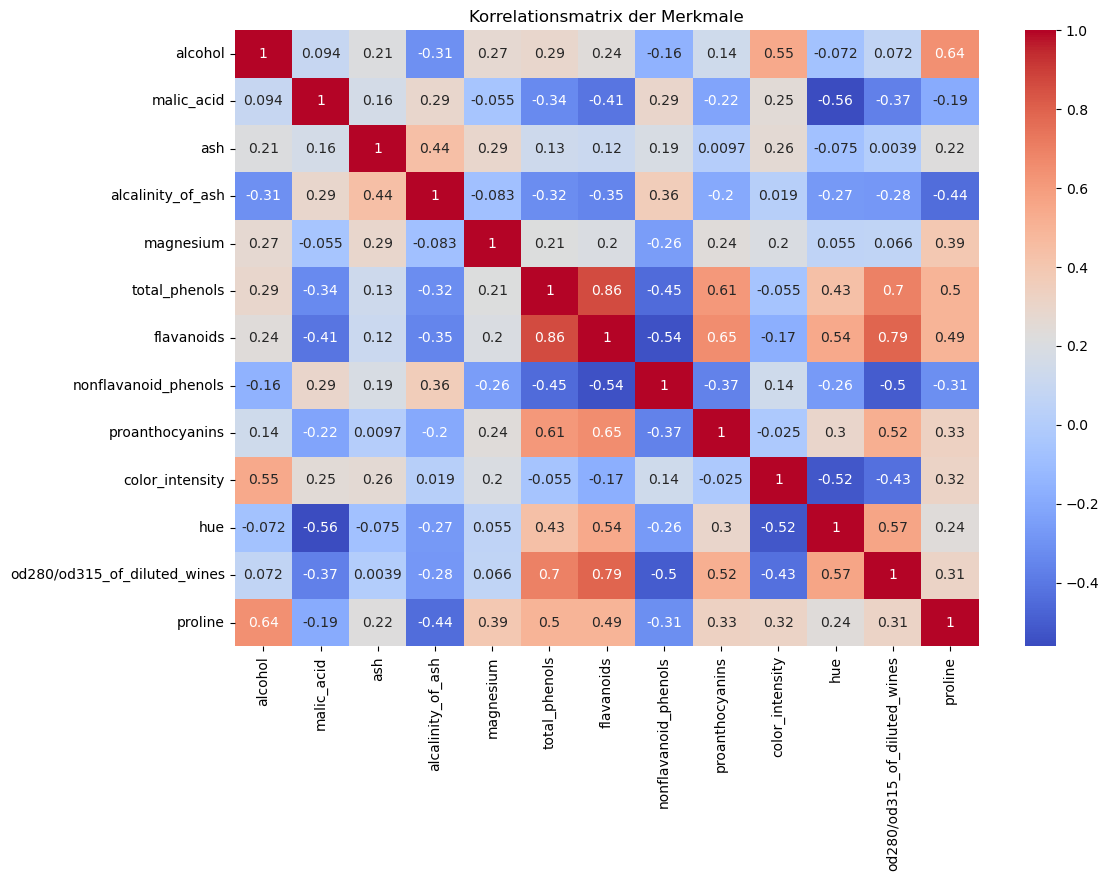

In [14]:
# Korrelationsmatrix
plt.figure(figsize=(12, 8))
sns.heatmap(X_scaled_df.corr(), annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix der Merkmale')
plt.show()

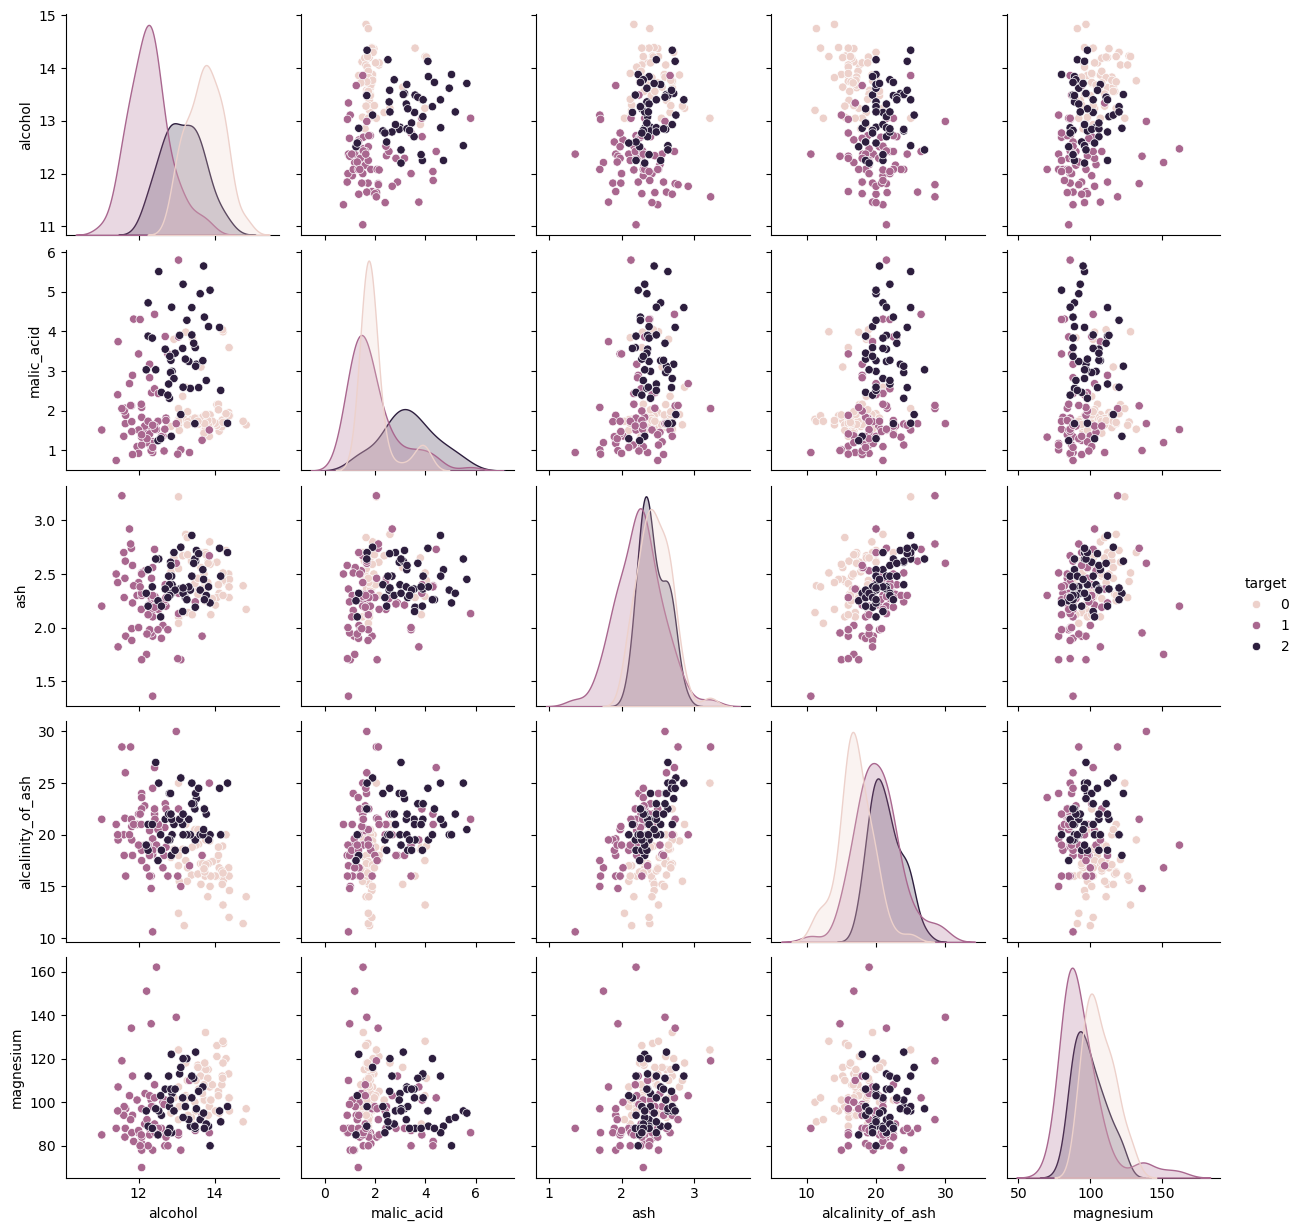

In [15]:
# Pairplot für ein paar Merkmale
sns.pairplot(df, hue='target', vars=df.columns[:5])
plt.show()

<a id="2-1-Mathematischer-Hintergrund:-Hauptkomponentenanalyse-(PCA)"></a>

### 2.1 Mathematischer Hintergrund: Hauptkomponentenanalyse (PCA) 

Die Hauptkomponentenanalyse (PCA) ist eine Methode zur **Dimensionsreduktion**, bei der die ursprünglichen Features eines Datensatzes in eine kleinere Anzahl von Variablen, den sogenannten Hauptkomponenten (Principal Components), transformiert werden. 

Die PCA führt eine **lineare Transformation** durch, bei der neue Achsen (Hauptkomponenten) so gewählt werden, dass die Daten entlang der neuen Achsen maximal variiert sind.

Die mathematische Definition der PCA beinhaltet die Berechnung der **Eigenvektoren** und **Eigenwerte** der Kovarianzmatrix der standardisierten Daten. Die Eigenvektoren bestimmen die Richtung der neuen Achsen, während die Eigenwerte die Varianz entlang dieser Achsen beschreiben.

Für einen Datensatz $( X $) mit $( n $ Beobachtungen und $ p $ Merkmalen:
1. Zunächst wird die **Kovarianzmatrix** $( \Sigma = \frac{1}{n-1} X^TX $) berechnet.
2. Dann werden die **Eigenvektoren** $ v_i $ und die **Eigenwerte** $( \lambda_i $) von $( \Sigma $) berechnet.
3. Die Eigenvektoren bestimmen die **Hauptkomponenten**, und die zugehörigen Eigenwerte geben an, wie viel Varianz von jeder Hauptkomponente erklärt wird.

Die erste Hauptkomponente erklärt die größte Varianz der Daten, die zweite die zweitgrößte, und so weiter.

Die Reduktion der Dimension erfolgt, indem nur die ersten $( k $) Hauptkomponenten verwendet werden, die den größten Teil der Varianz erklären.

<a id="3-PCA-Implementierung-und-Interpretation"></a>

## 3. PCA-Implementierung und Interpretation  


Als Nächstes werden wir die PCA auf die skalierten Daten anwenden. Die PCA wird uns helfen, die Dimensionalität des Datensatzes zu reduzieren und die wichtigsten Informationen zu erhalten.

<a id="3-1-PCA-Implementierung"></a>

### 3.1 PCA-Implementierung

In [16]:
# PCA anwenden
pca = PCA(n_components=None) # Alle Komponenten vorerst behalten
X_pca = pca.fit_transform(X_scaled)

# Erklärte Varianz
explained_variance = pca.explained_variance_ratio_

# Erstellen eines DataFrame mit PCA-Komponenten
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['target'] = y

# Anzeige der erklärten Varianz der einzelnen Komponenten
print("Erklärte Varianz durch jede Hauptkomponente:")
for i, variance in enumerate(explained_variance):
    print(f"Hauptkomponente {i+1}: {variance:.4f}")  


Erklärte Varianz durch jede Hauptkomponente:
Hauptkomponente 1: 0.3620
Hauptkomponente 2: 0.1921
Hauptkomponente 3: 0.1112
Hauptkomponente 4: 0.0707
Hauptkomponente 5: 0.0656
Hauptkomponente 6: 0.0494
Hauptkomponente 7: 0.0424
Hauptkomponente 8: 0.0268
Hauptkomponente 9: 0.0222
Hauptkomponente 10: 0.0193
Hauptkomponente 11: 0.0174
Hauptkomponente 12: 0.0130
Hauptkomponente 13: 0.0080


<a id="3-2-Mathematischer-Hintergrund:-Erklärte-Varianz"></a>
### 3.2 Mathematischer Hintergrund: Erklärte Varianz

Die erklärten Varianzanteile einer PCA geben an, wie viel Prozent der gesamten Datenvarianz durch jede der neuen Hauptkomponenten erklärt wird. Jede Hauptkomponente ist so gewählt, dass sie einen maximalen Anteil der Varianz in den Daten erklärt. 

Mathematisch gesehen ist die **erklärte Varianz** $( \lambda_i / \sum \lambda $), wobei $( \lambda_i $) der Eigenwert der $( i $)-ten Hauptkomponente ist. Der Eigenwert entspricht der Varianz, die entlang der Richtung des entsprechenden Eigenvektors existiert.

Wenn die ersten $( k $) Hauptkomponenten eine ausreichend große Menge der Varianz erklären (zum Beispiel 95 %), können wir die Dimension der Daten auf diese $( k $) Komponenten reduzieren, ohne signifikante Informationen zu verlieren.

<a id="3-3-Erklärte-Varianz-und-Scree-Test"></a>
### 3.3 Erklärte Varianz und Scree Test

Ein Scree Plot ist hilfreich, um zu verstehen, wie viel Varianz durch jede Hauptkomponente erklärt wird. Wir können damit entscheiden, wie viele Komponenten wir behalten wollen.

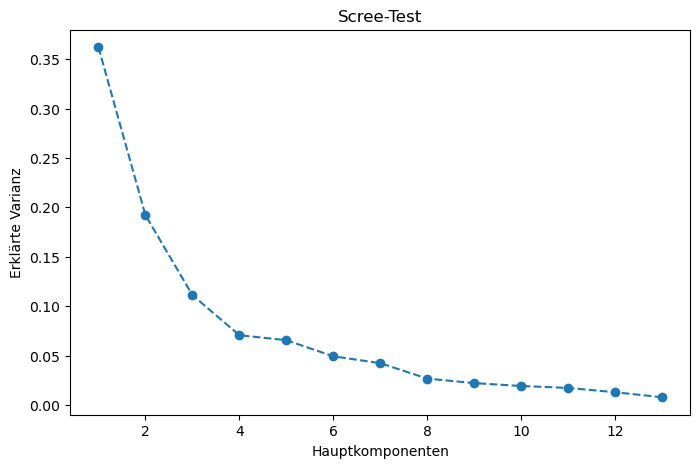

In [17]:
# Scree-Test
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Scree-Test')
plt.xlabel('Hauptkomponenten')
plt.ylabel('Erklärte Varianz')
plt.show()


<a id="3-4-Kumulativ-erklärte-Varianz"></a>
### 3.4 Kumulativ erklärte Varianz

Wir werden nun die kumulierte erklärte Varianz berechnen, um die Anzahl der Komponenten zu ermitteln, die einen erheblichen Anteil der Varianz erklären (z. B. 95 %).

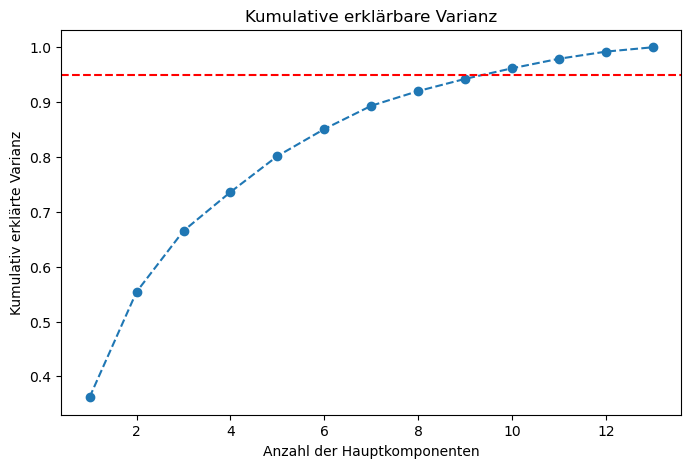

Anzahl der Hauptkomponenten, die 95% der Varianz erklären:10


In [18]:
# Kumulative erklärte Varianz
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Kumulative erklärbare Varianz')
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Kumulativ erklärte Varianz')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

# Ermittlung der Anzahl der Komponenten, die 95% der Varianz erklären
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Anzahl der Hauptkomponenten, die 95% der Varianz erklären:{num_components}")

<a id="4-Visualisierung-der-PCA-Ergebnisse"></a>
## 4. Visualisierung der PCA-Ergebnisse

Wir werden nun die Daten in dem neuen PCA-transformierten Raum visualisieren. Mithilfe der ersten beiden Hauptkomponenten können wir ein 2D-Streudiagramm erstellen, um zu prüfen, wie gut die PCA die Daten trennt.

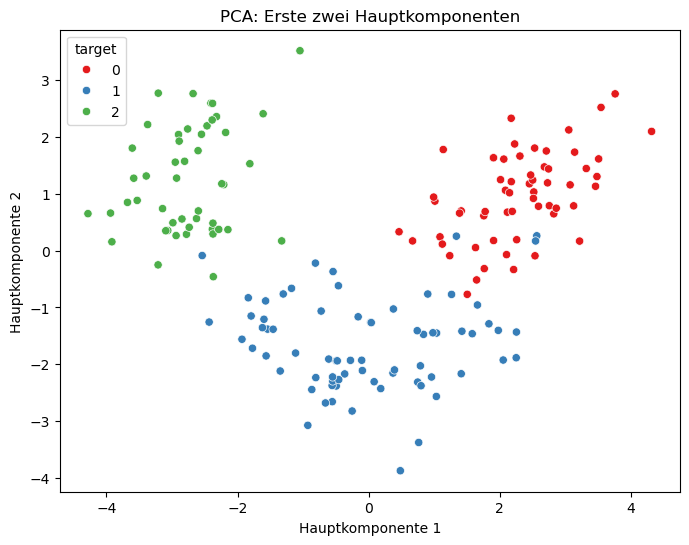

In [19]:
# Plotten der ersten beiden Hauptkomponenten
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='Set1')
plt.title('PCA: Erste zwei Hauptkomponenten')
plt.xlabel('Hauptkomponente 1')
plt.ylabel('Hauptkomponente 2')
plt.show()

<a id="4-1-Mathematischer-Hintergrund:-PCA-Visualisierung"></a>

### 4.1 Mathematischer Hintergrund: PCA-Visualisierung

Die Visualisierung der ersten beiden Hauptkomponenten zeigt die Projektion der hochdimensionalen Daten in einen zweidimensionalen Raum, der die maximale Varianz der Daten enthält. Da die PCA die Varianz maximiert, werden die Daten in diesen neuen Achsen gestreckt, wodurch Muster und Cluster in den Daten deutlicher sichtbar werden.

Diese Projektion dient dazu, die Beziehungen zwischen den Beobachtungen und die Trennung der Klassen (Zielvariable) zu visualisieren, wenn die ersten zwei Hauptkomponenten verwendet werden.

<a id="5-Dimensionalitätsreduktion-für-maschinelles-Lernen"></a>

## 5. Dimensionalitätsreduktion für maschinelles Lernen

Nachdem wir nun die Transformation verstanden haben, wollen wir die Dimensionalität unseres Datensatzes anhand der Anzahl der Hauptkomponenten, die 95 % der Varianz erklären, reduzieren und ihn für eine Klassifizierungsaufgabe verwenden.

<a id="5-1-PCA-zur-Dimensionalitätsreduzierung"></a>
### 5.1 PCA zur Dimensionalitätsreduzierung

In [20]:
# Reduzieren der Daten auf die ersten 'num_components' Hauptkomponenten
pca = PCA(n_components=num_components)
X_reduced = pca.fit_transform(X_scaled)

# Aufteilung der Daten in Trainings- und Testsätze
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

<a id="5-2-Modell-für-maschinelles-Lernen-mit-PCA"></a>

### 5.2 Modell für maschinelles Lernen mit PCA

Wir verwenden einen Random-Forest-Klassifikator, um die Auswirkungen der PCA auf die Modellleistung zu bewerten. Zunächst wird das Modell mit dem reduzierten Datensatz angepasst.

Klassifizierungsbericht mit PCA:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      0.95      0.95        21
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54



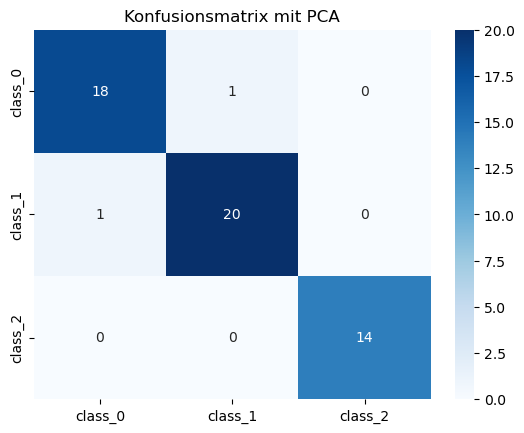

In [21]:
# Training eines Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Vorhersagen und Leistungsbewertung
y_pred = clf.predict(X_test)
print("Klassifizierungsbericht mit PCA:")
print(classification_report(y_test, y_pred))

# Konfusionsmatrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Konfusionsmatrix mit PCA')
plt.show()

<a id="5-3-Modell-ohne-PCA"></a>
### 5.3 Modell ohne PCA

Klassifizierungsbericht ohne PCA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



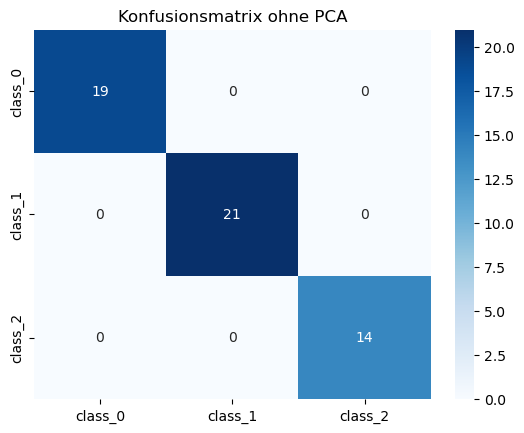

In [22]:
# Aufspaltung der Originaldaten (ohne PCA)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Training des Modells auf den Originaldaten
clf_orig = RandomForestClassifier(random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)

# Vorhersagen und Auswertung
y_pred_orig = clf_orig.predict(X_test_orig)
print("Klassifizierungsbericht ohne PCA:")
print(classification_report(y_test_orig, y_pred_orig))

# Konfusionsmatrix für Originaldaten
conf_matrix_orig = confusion_matrix(y_test_orig, y_pred_orig)
sns.heatmap(conf_matrix_orig, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Konfusionsmatrix ohne PCA')
plt.show()

<a id="6-Interpretation"></a>
## 6. Interpretation

Das Modell **ohne PCA** hat tendenziell eine höhere Genauigkeit, da es mit allen ursprünglichen Features arbeitet und keine Informationen reduziert wurden. Wenn die ursprünglichen Features alle relevante Information enthalten und nicht stark miteinander korreliert sind, führt PCA dazu, dass einige Informationen verloren gehen, die für die Klassifizierung wichtig sein könnten.

Das Modell **mit PCA** zeigt möglicherweise eine etwas geringere Genauigkeit, da PCA die Dimension der Daten reduziert, indem es die Daten in Hauptkomponenten umwandelt. PCA entfernt Redundanzen, aber es könnte auch Informationen entfernen, die für die Vorhersage wichtig sind. PCA eignet sich besonders gut, wenn es viele redundante oder stark korrelierte Features gibt, was in diesem Fall möglicherweise nicht so stark der Fall war.

<a id="6-1-Warum-PCA-manchmal-besser-performt:"></a>
### 6.1 Warum PCA manchmal besser performt:

PCA kann besonders vorteilhaft sein, wenn die ursprünglichen Features:
- **hochdimensional** sind (viele Features im Vergleich zu den Beobachtungen).
- **stark korrelierte** Merkmale enthalten, die Redundanzen im Modell erzeugen.
- das Modell durch Rauschen beeinflussen (d.h. einige Features sind irrelevant oder enthalten Rauschen).

In solchen Fällen kann PCA die Modellleistung verbessern, indem es nur die wesentlichen Informationen behält. Da der Wein-Datensatz jedoch gut strukturiert und nicht besonders hochdimensional ist, hat PCA in diesem Fall keine erhebliche Verbesserung gebracht.
